# Zomato Restaurants EDA

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install openpyxl
df = pd.read_csv('../input/zomato-restaurants-data/zomato.csv', encoding = 'latin-1')
sheet = pd.read_excel('../input/zomato-restaurants-data/Country-Code.xlsx')

     |████████████████████████████████| 242 kB 516 kB/s            


In [3]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df['Restaurant ID'].duplicated().sum()

0

In [9]:
sheet.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
sheet.shape

(15, 2)

In [11]:
sheet.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [12]:
final_df = pd.merge(df,sheet,on = 'Country Code', how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [13]:
final_df.drop('Country Code', axis=1,inplace=True)

In [14]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Currencies used in Countries

In [15]:
final_df.groupby(['Country','Currency']).size().reset_index().drop(0, axis=1)

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


### TOP 3 Countries as per the count of Restraunts

In [16]:
country_counts = final_df['Country'].value_counts()
country_counts.index[:3]

Index(['India', 'United States', 'United Kingdom'], dtype='object')

[]

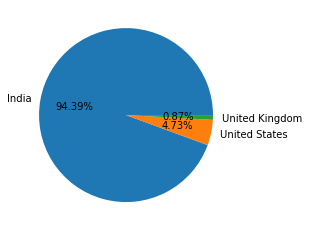

In [17]:
plt.pie(final_df['Country'].value_counts()[:3], labels=country_counts.index[:3],autopct='%1.2f%%')
plt.plot()

In [18]:
Indian_res = final_df[final_df['Country']=='India']

In [19]:
city_counts = Indian_res['City'].value_counts()
city_counts[:3]

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

[]

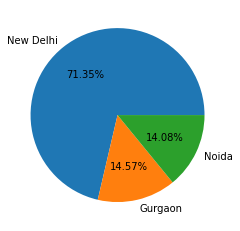

In [20]:
plt.pie(city_counts.values[:3], labels= city_counts.index[:3],autopct='%1.2f%%')
plt.plot()

In [21]:
Indian_res[Indian_res['City']=='New Delhi']['Locality'].value_counts()[:3]

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Name: Locality, dtype: int64

> **Observations:**
> * India is having max number of Zomato Associated Restaurants as Zomato is India Based Company.
> * India is followed by United States and United Kingdom.
> * Talking about the Indian Restaurants New Delhi has maximum Restaurants associated with zomato.
> * Which is followed by Gurgaon and Noida.
> * In New Delhi Connaught Place(122) , Rajouri Garden(99) and Shahdara(87) are the top 3 localities where Zomato is functioning.

### Ratings 

In [22]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


> **Observations:**
> 
> * Whenever the Rating is from 4.5 to 4.9 it Indicates that the Restraunt is Excellent
> * When Ratings are between 4.0 and 4.4 it Indicates that Restraunts are Very Good.
> * When ratings are between 3.5 to 3.9 it Indicates that Restraunts are Good.
> * When ratings are between 2.5 to 3.4 it Indicates that Restraunts are Average.
> * When ratings are between 1.8 to 2.4 it Indicates that Restraunts are Poor.

In [23]:
from numpy import median

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

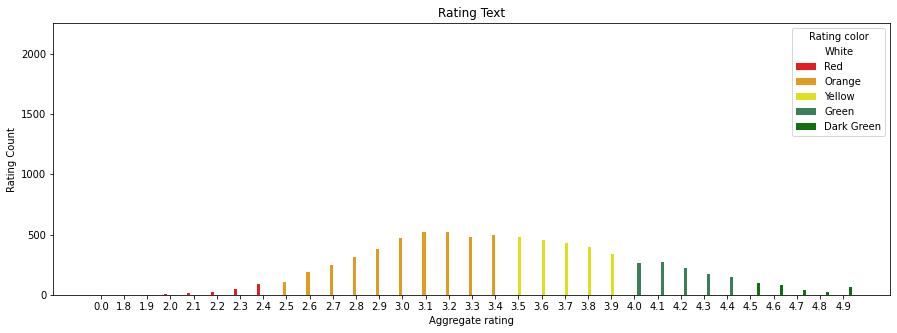

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(ratings['Aggregate rating'],ratings['Rating Count'],hue=ratings['Rating color'],estimator=median,palette=['white','red','orange','yellow','seagreen','green'])
plt.title('Rating Text')
plt.plot()

> **Observations:**
> * In rated Restaurants maximum rating count is for Average Rating (color = Yellow and value = 3.2)
> * In Good Category 3.5 was the rating given by maximum users
> 

In [25]:
final_df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

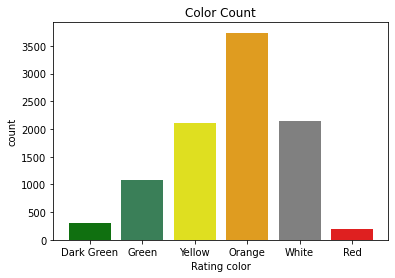

In [26]:
sns.countplot(final_df['Rating color'],palette=['green','seagreen','yellow','orange','gray','red'])
plt.title('Color Count')
plt.plot()

### Table Bookings

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

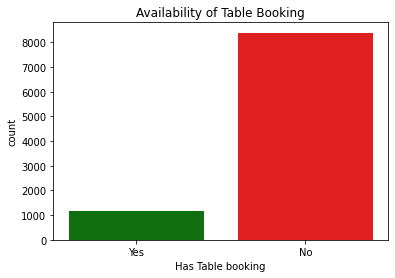

In [27]:
sns.countplot(final_df['Has Table booking'],palette=['green','red'])
plt.title('Availability of Table Booking')
plt.plot()

**Observation:**
* Mejority of Restaurants are not providing Table Bookings

### Average Cost for Two

In [28]:
avg_cost_table_booking = final_df.groupby('Has Table booking')['Average Cost for two'].mean()
avg_cost_table_booking 

Has Table booking
No     1152.757298
Yes    1535.898100
Name: Average Cost for two, dtype: float64

> **Observation:**
> * For the **Availability** of Table Booking Average cost of two is **1153**.
> * For the **unavailability** of Table Booking Average cost of two is **1536**.

In [29]:
final_df.groupby('Country')['Average Cost for two'].mean().sort_values(ascending =False)

Country
Indonesia         281190.476190
Sri Lanka           2375.000000
Phillipines         1606.818182
India                623.370319
South Africa         419.733333
Qatar                223.750000
UAE                  166.416667
Singapore            155.750000
Brazil               134.666667
Turkey                84.852941
New Zealand           69.750000
United Kingdom        47.812500
Canada                36.250000
United States         26.152074
Australia             24.083333
Name: Average Cost for two, dtype: float64

*But these digits will be taken into consideration according to currency of that perticular country*

In [30]:
Indian_res.groupby('City')['Average Cost for two'].mean().sort_values(ascending =False)[-3:]

City
Varanasi     505.000000
Amritsar     480.952381
Faridabad    447.609562
Name: Average Cost for two, dtype: float64

> **Observations:**
> * Top 3 cities with heighest Average Cost for two are **Panchkula,Hydrabad and Pune**
> * Bottom 3 cities with heighest Average Cost for two are **Faridabad, Amritsar,Varanasi**

In [31]:
columns = final_df.columns
columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Online Delivery

In [32]:
online_delivery = final_df['Has Online delivery'].value_counts()
online_delivery

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

[]

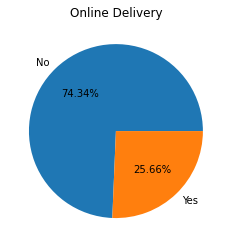

In [33]:
plt.pie(online_delivery.values, labels= online_delivery.index, autopct='%1.2f%%')
plt.title('Online Delivery')
plt.plot()

**74% of Restaurants are providing online Delivery**

In [34]:
final_df.groupby(['Has Online delivery','Is delivering now']).size().reset_index()

,Has Online delivery,Is delivering now,0
0,No,No,7100
1,Yes,No,2417
2,Yes,Yes,34


### Average Votes

In [35]:
final_df.groupby('Country')['Votes'].sum().sort_values(ascending = False)

Country
India             1187163
United States      185848
UAE                 29611
South Africa        18910
United Kingdom      16439
Indonesia           16214
Turkey              14670
New Zealand          9721
Phillipines          8963
Qatar                3276
Sri Lanka            2929
Australia            2674
Brazil               1177
Singapore             638
Canada                412
Name: Votes, dtype: int64

In [36]:
final_df.groupby('Country')['Votes'].mean().sort_values(ascending = False)

Country
Indonesia         772.095238
UAE               493.516667
Turkey            431.470588
United States     428.221198
Phillipines       407.409091
South Africa      315.166667
New Zealand       243.025000
United Kingdom    205.487500
Qatar             163.800000
Sri Lanka         146.450000
India             137.212552
Australia         111.416667
Canada            103.000000
Singapore          31.900000
Brazil             19.616667
Name: Votes, dtype: float64

> **Observations:**
> * India is having Heighest Number of Votes
> * Indonesia is having max number of average Votes

In [37]:
columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Price Range

In [38]:
final_df['Price range'].unique()

array([3, 4, 2, 1])

> **Assumptions:**
> 
> 1 - Low rates
> 
> 2 - Average rates
> 
> 3- High rates
> 
> 4- very high rates

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants with Different Price Range')

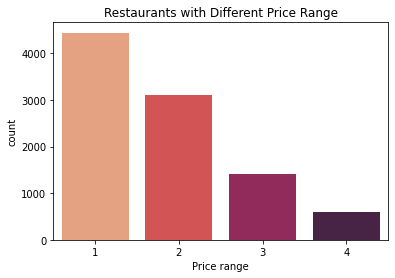

In [39]:
sns.countplot(final_df['Price range'],palette='rocket_r')
plt.title('Restaurants with Different Price Range')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants with Different Price Range in India')

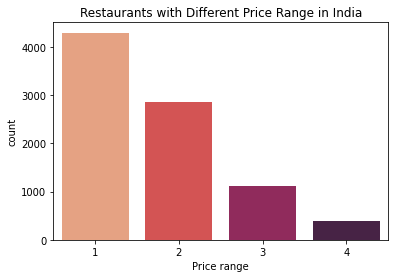

In [40]:
sns.countplot(Indian_res['Price range'],palette='rocket_r')
plt.title('Restaurants with Different Price Range in India')

### Cuisines

In [41]:
final_df['Cuisines'].value_counts()[:3]

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

In [42]:
Indian_res['Cuisines'].value_counts()[:3]

North Indian             936
North Indian, Chinese    511
Fast Food                348
Name: Cuisines, dtype: int64

In [43]:
print('Number of Cuisines present Internationally:', len(final_df['Cuisines'].unique()))
print('Number of Cuisines present in India:', len(Indian_res['Cuisines'].unique()))

Number of Cuisines present Internationally: 1826
Number of Cuisines present in India: 1392


In [44]:
print('Cuisines Present in Mumbai :',len(Indian_res[Indian_res['City']=='Mumbai']['Cuisines'].unique()))

Cuisines Present in Mumbai : 16


# Thank you Vising this Notebook Please share your valuable Feedback !